In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Load the dataset
df = pd.read_csv("../data/inputs/cleaned/BankChurners_cleaned.csv")
df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,credit_limit_usage,avg_balance,trans_per_month,avg_amt_per_trans,tenure_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,False,False,False,False,0.061224,0.938776,1.076923,27.238095,3-4 Years
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,True,False,False,False,False,0.104651,0.895349,0.750000,39.121212,3-4 Years
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,False,False,False,False,0.000000,1.000000,0.555556,94.350000,2-3 Years
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,True,False,False,False,False,0.759734,0.240266,0.588235,58.550000,2-3 Years
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,False,False,False,False,False,0.000000,1.000000,1.333333,29.142857,1-2 Years


# Credit Limit Usage by Churn

C:\Users\ronni\AppData\Local\Temp\ipykernel_36860\1177209601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="credit_limit_usage", data=df, palette="Set2")


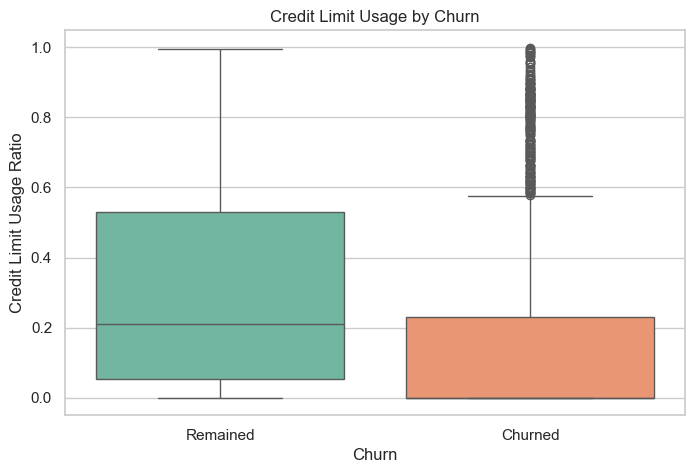

In [3]:
# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Boxplot
sns.boxplot(x="Churn", y="credit_limit_usage", data=df, palette="Set2")

# Add title and labels
plt.title("Credit Limit Usage by Churn")
plt.xlabel("Churn")
plt.ylabel("Credit Limit Usage Ratio")
plt.xticks([0, 1], ['Remained', 'Churned'])

# Save the plot
plt.savefig("../data/inputs/images/credit_limit_usage_by_churn.png", dpi=300, bbox_inches='tight')

### This chart compares the credit limit usage ratio between customers who stayed and those who churned.

* X-axis: Churn status (Stayed vs Churned)

* Y-axis: Ratio of revolving balance to credit limit (credit_limit_usage)

* Boxplot: Shows the distribution, median, and potential outliers for each group

### Interpretation:
* Churned customers tend to have slightly higher credit limit usage compared to those who stayed.

* The median credit limit usage is higher for churned customers, suggesting that those using more of their credit are more likely to churn.

* There's also greater variability in the usage among customers who churned, indicating financial behavior differences.

### Insight:
High credit utilization might be a risk factor for customer churn. The bank could consider targeting these customers with better credit management offers or support to reduce churn risk.
